In [3]:
import pandas as pd
df = pd.read_csv('data/user_behavior_dataset.csv')

In [4]:
X = df.drop(['User Behavior Class', 'Device Model', 'User ID'], axis=1)
y = df['User Behavior Class']

In [5]:
num_cols = X.select_dtypes(include=['int64, float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [6]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

X_encoded = ohe.fit_transform(X[cat_cols])

X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(cat_cols))

X = pd.concat([X, X_encoded_df], axis=1)
X = X.drop(cat_cols, axis=1)
X.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
0,393,6.4,1872,67,1122,40,1.0,0.0,0.0,1.0
1,268,4.7,1331,42,944,47,1.0,0.0,1.0,0.0
2,154,4.0,761,32,322,42,1.0,0.0,0.0,1.0
3,239,4.8,1676,56,871,20,1.0,0.0,0.0,1.0
4,187,4.3,1367,58,988,31,0.0,1.0,1.0,0.0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
print(type(X_train))

<class 'numpy.ndarray'>


In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



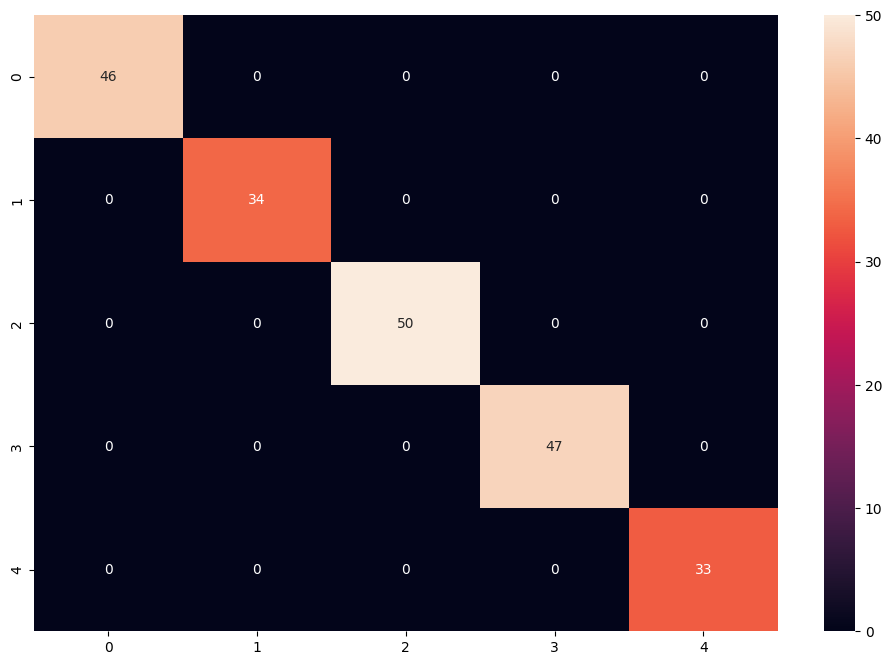

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)
plt.show()